In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

conn = sqlite3.connect("factbook.db")
q1 = "SELECT * FROM sqlite_master WHERE type = 'table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
q2 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
q3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
q4 = "SELECT name FROM facts WHERE population = 0 OR population = 7256490011;"
pd.read_sql_query(q4, conn)

,name
0,Antarctica
1,World


Antartica being an uninhabited country seems a fair assessment but should it be featured in this table is the more pertinent question.

The "World" entry should be isolated in a table of it's own, as it would affect the column statistics we want to estimate.

## What does the distribution of population growth look like around the world ?

In [5]:
q5 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE (population > 0) AND (population < 7000000000);"
df = pd.read_sql_query(q5, conn)

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8680184e80>,
      dtype=object)

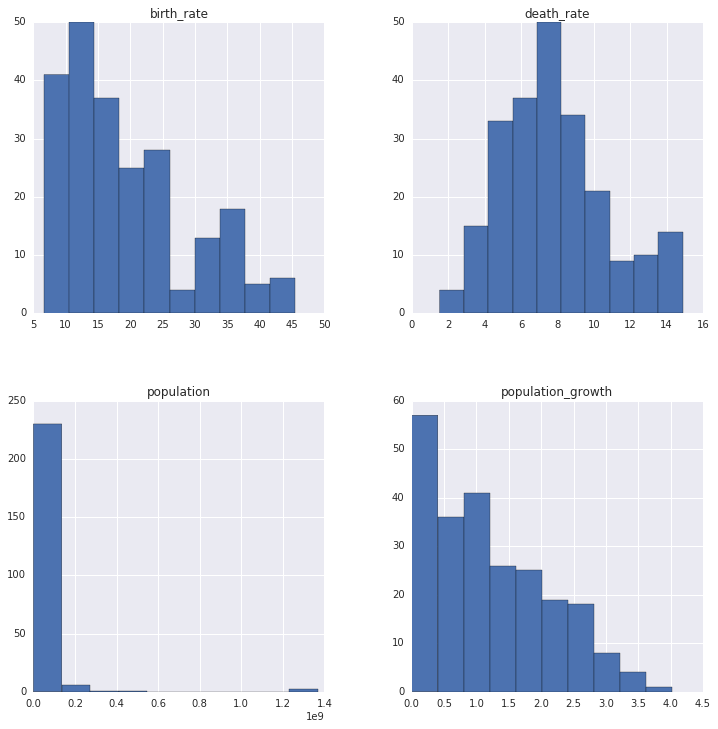

In [8]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(221)
df.hist(ax=ax)

## Which countries in the world are populated densely ?

In [16]:
q6 = '''SELECT name, population, area_land, (CAST(population as float)/CAST(area_land as float)) population_density FROM facts 
WHERE (population > 0) AND (population < 7000000000) 
ORDER BY population_density DESC;'''
df2 = pd.read_sql_query(q6, conn)
df2

,name,population,area_land,population_density
0,Macau,592731,28.0,21168.964286
1,Monaco,30535,2.0,15267.500000
2,Singapore,5674472,687.0,8259.784571
3,Hong Kong,7141106,1073.0,6655.271202
4,Gaza Strip,1869055,360.0,5191.819444
5,Gibraltar,29258,6.0,4876.333333
6,Bahrain,1346613,760.0,1771.859211
7,Maldives,393253,298.0,1319.640940
8,Malta,413965,316.0,1310.015823
9,Bermuda,70196,54.0,1299.925926


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8676895898>,
      dtype=object)

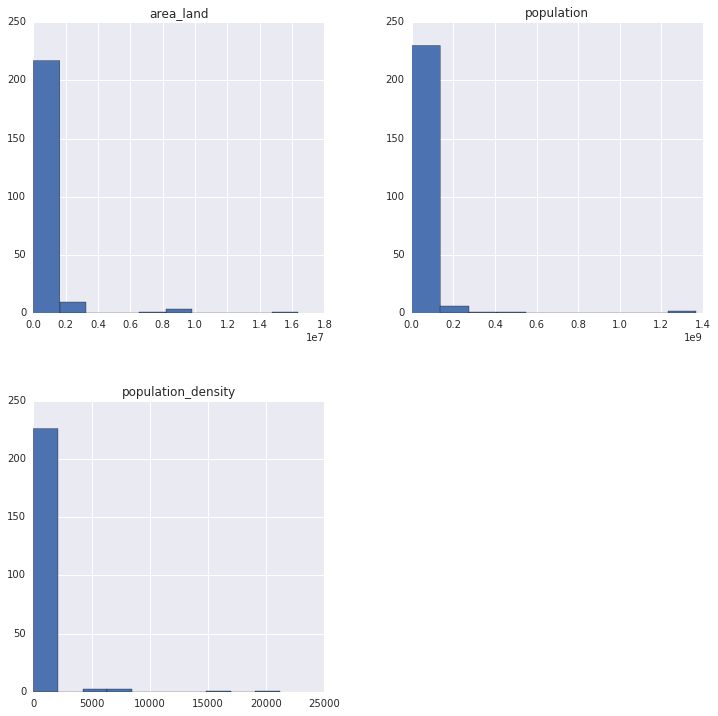

In [15]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(221)
df2.hist(ax=ax)

## Which countries are more water than land ?

In [19]:
q7 = '''SELECT name, population, area_land, area_water, (CAST(area_water as float)/CAST(area_land as float)) water_to_land_ratio FROM facts 
WHERE (population > 0) AND (population < 7000000000) 
ORDER BY water_to_land_ratio DESC;'''
df3 = pd.read_sql_query(q7, conn)
df3

,name,population,area_land,area_water,water_to_land_ratio
0,Virgin Islands,103574,346.0,1564.0,4.520231
1,Puerto Rico,3598357,8870.0,4921.0,0.554791
2,"Bahamas, The",324597,10010.0,3870.0,0.386613
3,Guinea-Bissau,1726170,28120.0,8005.0,0.284673
4,Malawi,17964697,94080.0,24404.0,0.259396
5,Netherlands,16947904,33893.0,7650.0,0.225710
6,Uganda,37101745,197100.0,43938.0,0.222922
7,Eritrea,6527689,101000.0,16600.0,0.164356
8,Liberia,4195666,96320.0,15049.0,0.156240
9,Bangladesh,168957745,130170.0,18290.0,0.140509
